# Labelize Algorithm

## Briefing

We prepare a dateset consisting of two random sets of geometric points in the geojson format: *PointGeomFigure* and *TextPointGeomFigure*/

The goal of the algorithm is to pair the points with the text and return the text in place of the point/

## Imports

In [22]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json

from shapely.ops import nearest_points
from shapely.geometry import Point


point_layer = """{
           "layername": "$_ROBOCZY",
           "data": {
               "type": "FeatureCollection",
               "features": [
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   18.0,
                                   20.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   47.0,
                                   18.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   90.0,
                                   78.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   },
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   25.0,
                                   85.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   }
                   ,
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   83.0,
                                   42.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "geo_type": "Point"
                       }
                   }
               ]
           }
       }"""

text_layer = """{
           "layername": "$_ROBOCZY",
           "data": {
               "type": "FeatureCollection",
               "features": [
                   {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                    15.0,
                                    15.0,
                                    0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   18.0,
                                   18.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   95.0,
                                   82.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   20.0,
                                   80.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                                      {
                       "type": "Feature",
                       "geometry": {
                           "type": "Point",
                           "coordinates":
                               [
                                   80.0,
                                   40.0,
                                   0.0
                               ]
                       },
                       "properties": {
                           "text": "asdasdasdasd",
                           "geo_type": "TextPoint"
                       }
                   },
                   
               ]
           }
       }"""

## Data preparation

In [23]:
exact_points = gpd.read_file(point_layer, driver='GeoJSON')
text_points = gpd.read_file(text_layer, driver='GeoJSON')

In [24]:
exact_points.reset_index(inplace=True)
exact_points = exact_points.rename(columns = {'index':'point_id'})
exact_points

,point_id,geo_type,geometry
0,0,Point,POINT Z (18.00000 20.00000 0.00000)
1,1,Point,POINT Z (47.00000 18.00000 0.00000)
2,2,Point,POINT Z (90.00000 78.00000 0.00000)
3,3,Point,POINT Z (25.00000 85.00000 0.00000)
4,4,Point,POINT Z (83.00000 42.00000 0.00000)


In [25]:
text_points.reset_index(inplace=True)
text_points = text_points.rename(columns = {'index':'text_id'})
text_points

,text_id,text,geo_type,geometry
0,0,asdasdasdasd,TextPoint,POINT Z (15.00000 15.00000 0.00000)
1,1,asdasdasdasd,TextPoint,POINT Z (18.00000 18.00000 0.00000)
2,2,asdasdasdasd,TextPoint,POINT Z (95.00000 82.00000 0.00000)
3,3,asdasdasdasd,TextPoint,POINT Z (20.00000 80.00000 0.00000)
4,4,asdasdasdasd,TextPoint,POINT Z (80.00000 40.00000 0.00000)


<AxesSubplot:>

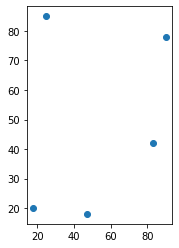

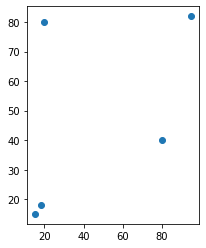

In [26]:
exact_points.plot()
text_points.plot()

In [32]:
def near(point, pts=pts3):
    nearest = gpd2.geometry == nearest_points(point, pts)[1]
    return gpd2[nearest].Place.get_values()[0]

In [33]:
print(type(pts3))

<class 'shapely.geometry.multipoint.MultiPoint'>


In [35]:
def near(point, pts=pts3):
    nearest = text_points.geometry == nearest_points(point, pts)[1]
    return text_points[nearest].text_id.get_values()[0]

In [36]:
exact_points['Nearest'] = exact_points.apply(lambda row: near(row.geometry), axis=1)

AttributeError: 'Series' object has no attribute 'get_values'

In [31]:
nearest

NameError: name 'nearest' is not defined

In [34]:
exact_points.geometry.apply(lambda g: text_points.distance(g))

C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_22040\2608735356.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  exact_points.geometry.apply(lambda g: text_points.distance(g))


,0,1,2,3,4
0,5.830952,2.000000,98.858485,60.033324,65.145990
1,32.140317,29.000000,80.000000,67.623960,39.661064
2,97.948966,93.722996,6.403124,70.028566,39.293765
3,70.710678,67.364679,70.064256,7.071068,71.063352
4,73.164199,69.289249,41.761226,73.573093,3.605551


In [35]:
for row in exact_points.itertuples():
    nearest = ckdnearest(exact_points, text_points)
    
    print(row)

Pandas(Index=0, point_id=0, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x000001D577989D60>)
Pandas(Index=1, point_id=1, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x000001D5779899A0>)
Pandas(Index=2, point_id=2, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x000001D577989130>)
Pandas(Index=3, point_id=3, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x000001D57759E0A0>)
Pandas(Index=4, point_id=4, geo_type='Point', geometry=<shapely.geometry.point.Point object at 0x000001D5779E58E0>)
